<a href="https://colab.research.google.com/github/Aneeshakaramath/LGMVIP-DataScience/blob/main/PREDICTION_USING_SUPERVISED_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **THE SPARKS FOUNDATION-GRIP 2022**
# GRADUATE ROTATIONAL INTERNSHP PROGRAM
 September 2022
 
 BY ANEESHA PARVEEN S K

# **PREDICTION USING SUPERVISED ML**



# AIM

To predict the percentage of a student based on the number of study hours.
to predict the score of a student if a student studies for 9.25 hrs/day.

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


# UNDERSTANDING THE DATA

In [6]:
data.shape

(25, 2)

In [7]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [8]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [9]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [11]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


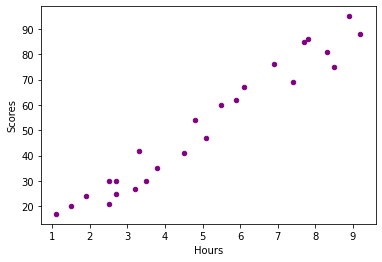

In [14]:
data.plot(kind='scatter', x='Hours', y='Scores',color='purple')
plt.show()


In [18]:
data.corr(method = 'pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [16]:
data.corr(method = 'kendall')

,Hours,Scores
Hours,1.000000,0.884035
Scores,0.884035,1.000000


In [17]:
data.corr(method = 'spearman')

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


In [19]:
hours = data['Hours']
scores = data['Scores']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


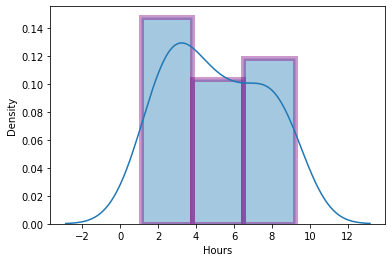

In [30]:
# depict illustration
sns.distplot(hours,
   hist_kws=dict(edgecolor="purple", linewidth=5))


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


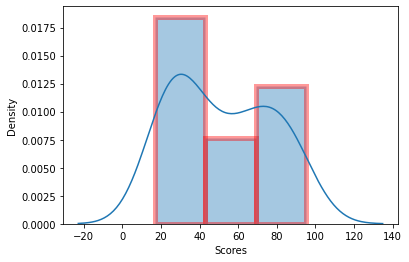

In [31]:
sns.distplot(scores,hist_kws=dict(edgecolor="red", linewidth=5))

# DATA VISUALIZATION USING LINEAR REGRESSION

In [32]:
x = data.iloc[:,:-1].values
y = data.iloc[:,1].values

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=50)

In [34]:

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

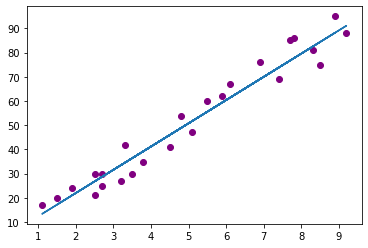

In [37]:
m=reg.coef_
c=reg.intercept_
line = m*x+c
plt.scatter(x,y,color='purple')
plt.plot(x,line)
plt.show()

In [38]:
y_pred = reg.predict(x_test)

In [39]:
actual_predicted = pd.DataFrame({'Target':y_test,'Predicted':y_pred})
actual_predicted

,Target,Predicted
0,95,88.211394
1,30,28.718453
2,76,69.020122
3,35,39.273652
4,17,13.365436


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


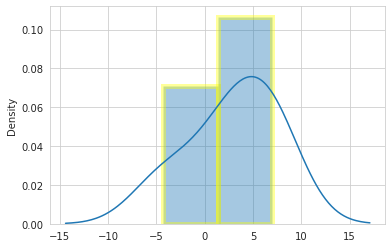

In [41]:
sns.set_style('whitegrid')
sns.distplot(np.array(y_test-y_pred),hist_kws=dict(edgecolor="yellow", linewidth=5))
plt.show()

# What would be the predicted score if a student studies for 9.25 hours/day?

In [42]:
h=9.25
s=reg.predict([[h]])
print("If a student studies for {} hours per day he/she will score {}% in exams.".format(h,s))

If a student studies for 9.25 hours per day he/she will score [91.56986604]% in exams.


# MODEL EVALUATION

In [43]:
from sklearn import metrics
from sklearn.metrics import r2_score
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))
print("R2 Score:",r2_score(y_test,y_pred))

Mean Absolute Error: 4.5916495300630285
R2 Score: 0.971014141329942




---

